## Predict Salary Hike

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
import statsmodels.formula.api as smf

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Understanding the Data

In [5]:
salary = pd.read_csv('Salary_Data.csv')

In [6]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
salary.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

<AxesSubplot:>

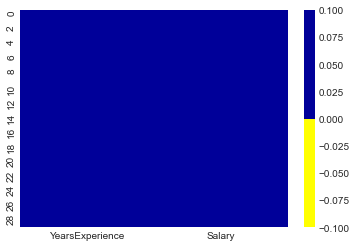

In [9]:
colors= ['#ffff00','#000099']
sns.heatmap(salary.isnull(),cmap=sns.color_palette(colors))

In [ ]:
# there is no missing values in the data

In [10]:
#duplicates 
salary[salary.duplicated()].shape

(0, 2)

In [ ]:
# no duplicates in data

Text(0.5, 1.0, 'Checking Outliers in Years Experience')

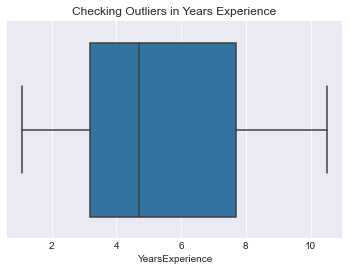

In [11]:
# finding the outliers 

sns.boxplot(salary['YearsExperience'])
plt.title('Checking Outliers in Years Experience')


Text(0.5, 1.0, 'Checking Outliers in Salary')

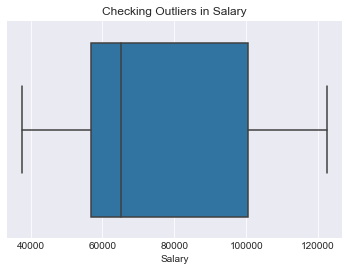

In [12]:
# finding the outliers 

sns.boxplot(salary['Salary'])
plt.title('Checking Outliers in Salary')

In [ ]:
# no outliers in data

### Step 1: Understanding the Linearity 

Text(0.5, 1.0, 'Predicting Salary Hike')

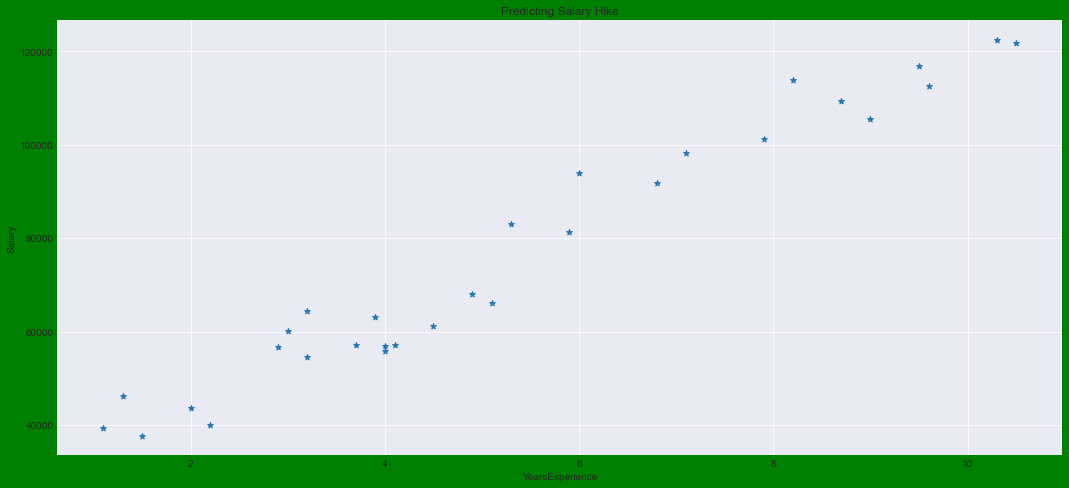

In [13]:
# Scatter plot

plt.figure(figsize=(18,8),facecolor='g')
plt.scatter(salary['YearsExperience'],salary['Salary'],marker = '*')

plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Predicting Salary Hike')

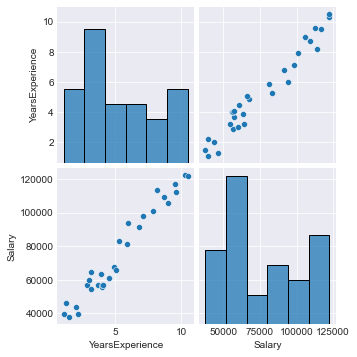

In [14]:
sns.pairplot(salary)

In [15]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

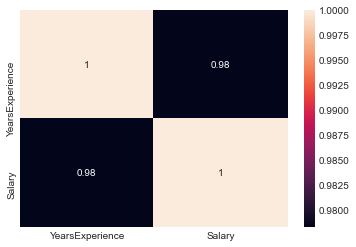

In [16]:
sns.heatmap(salary.corr(),annot=True)

In [ ]:
# There is strong +ve corelation  r= 0.978

### Step 2 : Creating the Linear Model & Checking Fitness

In [17]:
lr=LinearRegression()

x = salary['YearsExperience'].values.reshape(30,1)
y = salary['Salary'].values.reshape(30,1)

hike_model = lr.fit(x,y)

print(f'The LR line coefficient is - {hike_model.coef_}')
print(f'The LR Line intercept is - {hike_model.intercept_}')

print(f'The equation of LR is {hike_model.coef_}*x+{hike_model.intercept_}')

pred = hike_model.predict(x)

r2score = r2_score(y,pred)
print(f'the R squared Score is- {r2score}')

The LR line coefficient is - [[9449.96232146]]
The LR Line intercept is - [25792.20019867]
The equation of LR is [[9449.96232146]]*x+[25792.20019867]
the R squared Score is- 0.9569566641435086


In [ ]:
# since R squared Score is- 0.9569 - model is good 

Text(0.5, 1.0, 'Predicting Salary Hike')

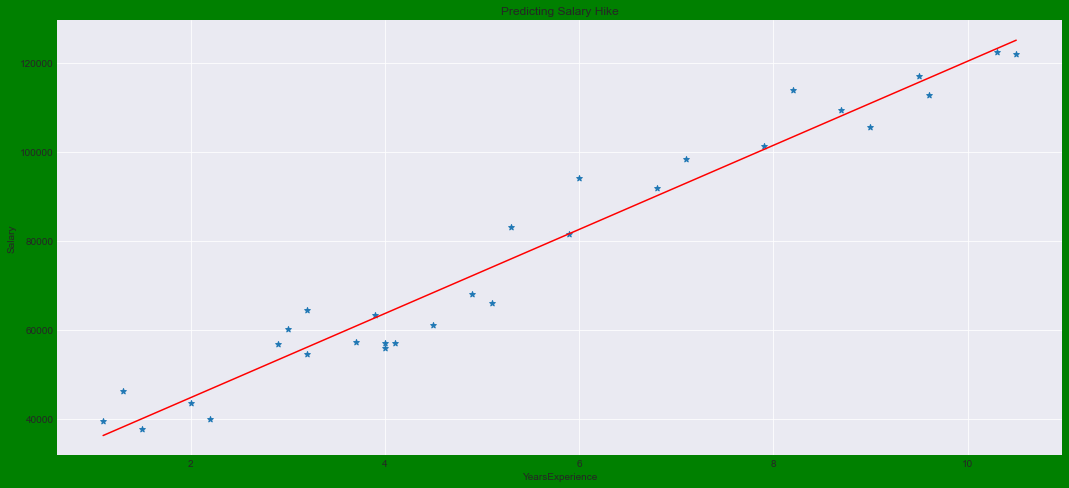

In [18]:
# Scatter plot with regression line

plt.figure(figsize=(18,8),facecolor='g')
plt.scatter(salary['YearsExperience'],salary['Salary'],marker = '*')

plt.plot(x,pred,color='r')# regression line

plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Predicting Salary Hike')

Text(0.5, 1.0, 'Predicting Salary Hike')

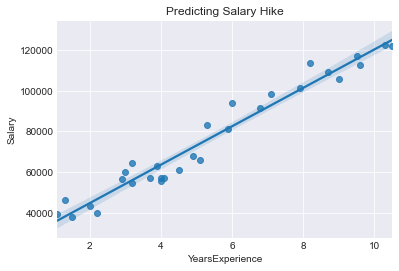

In [19]:
sns.regplot(x,y,fit_reg=True)
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Predicting Salary Hike')